# Cleaning Box Office Data
## Part 2
#### Data Cleaning and EDA

This is a notebook is for cleaning data, checking assumptions, and Exploratory Data Analyis (EDA)

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import re

%matplotlib inline

In [2]:
pd.options.display.max_rows = 1000
pd.set_option('precision', 3)

### Column Description

- 'TITLE' = Title 
- 'ADJ_GROSS' = Adjusted (2017) total domestic grossing
- 'RELEASE' = Release date as datetime object
- 'AGE' = Age as of January 31, 2018
- 'GENRE' = Movie genre
- 'RUNTIME' = Runtime in minutes
- 'RATING' = MPAA Rating (G, PG, PG-13, R, Unrated)
- 'BUDGET' = Budget (Unadjusted)

In [3]:
# All the pickled files from part 1 to be concatenated into a single dataframe
df1 = pd.read_pickle('data/mojo_jojo2500.pickle')
df2 = pd.read_pickle('data/mojo_jojo5000.pickle')
df3 = pd.read_pickle('data/mojo_jojo7500.pickle')
df4 = pd.read_pickle('data/mojo_jojo10000.pickle')
df5 = pd.read_pickle('data/mojo_jojo12500.pickle')
df6 = pd.read_pickle('data/mojo_jojo15163.pickle')
df = pd.concat([df1, df2, df3, df4, df5, df6])

In [4]:
# Some info on our data, missing values
df.info()
print("Shape: ", df.shape)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15163 entries, 0 to 2662
Data columns (total 11 columns):
ADJ_GROSS    15107 non-null float64
AGE          15107 non-null timedelta64[ns]
BUDGET       3103 non-null float64
DOMESTIC     15103 non-null float64
GENRE        15107 non-null object
IDX          15163 non-null int64
RATING       15107 non-null object
RELEASE      15107 non-null datetime64[ns]
RUNTIME      14713 non-null float64
TITLE        15107 non-null object
WORLD        7134 non-null float64
dtypes: datetime64[ns](1), float64(5), int64(1), object(3), timedelta64[ns](1)
memory usage: 1.4+ MB
Shape:  (15163, 11)


In [5]:
# We do not need IDX, DOMESTIC, or WORLD for this regression
df.drop(['IDX', 'DOMESTIC', 'WORLD'], axis = 1, inplace = True)

# Convert the timedelta object to a float for actual age in days
df.AGE = df.AGE.astype('timedelta64[D]')

# View
view = 2
df.iloc[np.r_[0:view, -view:0]]

,ADJ_GROSS,AGE,BUDGET,GENRE,RATING,RELEASE,RUNTIME,TITLE
0,7.074e+08,13769.0,1.800e+07,Sci-Fi Fantasy,PG,1980-05-21,129.0,The Empire Strikes Back
1,3.444e+08,13557.0,NaN,Comedy,PG,1980-12-19,110.0,9 to 5
2661,3.000e+03,5.0,NaN,Action,R,2018-01-26,110.0,Kickboxer Retaliation
2662,1.000e+03,5.0,NaN,Documentary,Unrated,2018-01-26,84.0,West of the Jordan River


In [6]:
# Strip titles of any whitespaces
df.TITLE.str.strip();

In [7]:
# Look at null value counts
df.isnull().sum()

ADJ_GROSS       56
AGE             56
BUDGET       12060
GENRE           56
RATING          56
RELEASE         56
RUNTIME        450
TITLE           56
dtype: int64

In [8]:
# Drop the 56 rows with no title
df.dropna(subset=['TITLE'], axis=0, inplace=True)

In [9]:
# Look at null value counts
df.isnull().sum()

ADJ_GROSS        0
AGE              0
BUDGET       12004
GENRE            0
RATING           0
RELEASE          0
RUNTIME        394
TITLE            0
dtype: int64

In [10]:
# Check for duplicates released on same day
print("Row duplicates: ", df.duplicated(subset=['TITLE']).sum())

Row duplicates:  547


In [11]:
# Explore duplicates
df.sort_values(['TITLE', 'ADJ_GROSS'], inplace=True, ascending=False)
df.loc[df.duplicated(subset=['TITLE'], keep = False)]

,ADJ_GROSS,AGE,BUDGET,GENRE,RATING,RELEASE,RUNTIME,TITLE
695,2.807e+06,789.0,NaN,Drama,R,2015-12-04,118.0,Youth
2119,1.849e+06,47.0,NaN,Drama,Unrated,2017-12-15,136.0,Youth
883,1.503e+05,782.0,NaN,Family,PG,2015-12-11,98.0,Yellow Day
311,3.290e+04,1230.0,NaN,Family,PG,2014-09-19,98.0,Yellow Day
1759,1.411e+06,10526.0,NaN,Unknown,Unrated,1989-04-07,103.0,Wuthering Heights
1334,1.125e+05,1944.0,NaN,Drama,Unrated,2012-10-05,129.0,Wuthering Heights
1070,1.578e+06,5234.0,NaN,Crime Drama,R,2003-10-03,109.0,Wonderland
2390,6.894e+05,6396.0,NaN,Unknown,R,2000-07-28,109.0,Wonderland
1917,8.205e+06,6802.0,NaN,IMAX,Unrated,1999-06-18,40.0,Wolves
388,1.310e+04,1174.0,NaN,Action Horror,R,2014-11-14,91.0,Wolves


In [12]:
# This will grab the highest grossing duplicate
df.drop_duplicates(subset=['TITLE'], inplace=True, keep='first')

# Dropping outliers with extreme runtimes, those are not traditional movies that would be useful for our model
# Client would be interested in a specific target audience, these movies do not cater to our target audience
mask = (df.RUNTIME < 200)
df = df[mask]

# Confirm drop
print("Row duplicates: ", df.duplicated(subset=['TITLE']).sum())

Row duplicates:  0


In [13]:
df.index = pd.RangeIndex(len(df.index))
print("Shape: ", df.shape)

Shape:  (14131, 8)


In [14]:
# Explore unique genres
print('Unique groups of ratings: ', df.groupby('RATING')['TITLE'].ngroups)
df.groupby('RATING')['TITLE'].nunique().sort_values(ascending=False)

Unique groups of ratings:  9


RATING
R                5368
Unrated          3841
PG-13            2816
PG               1733
G                 297
Not Yet Rated      36
NC-17              31
Unknown             8
GP                  1
Name: TITLE, dtype: int64

The G rated movies do not have enough observations to hold its own class. I am going to group them with the PG ratings for a family-oriented variable

In [15]:
# Grouping G and PG movies
# Random error for PG
mask = ((df.RATING == 'GP') | 
        (df.RATING == 'PG') |
        (df.RATING == 'G'))
df.at[df.index[mask].tolist(), 'RATING'] = 'FAMILY'

# Do not want this dash to mess things up later!
mask = (df.RATING == 'PG-13')
df.at[df.index[mask].tolist(), 'RATING'] = 'PG13'

In [16]:
# All insignificant ratings will serve as the baseline
# This is a cool way to change specific values over a series, but it can get even better, see
mask = ((df.RATING == 'Unrated') | 
        (df.RATING == 'NC-17') |
        (df.RATING == 'Unknown') |
        (df.RATING == 'Not Yet Rated'))

df.at[df.index[mask].tolist(), 'RATING'] = None

In [17]:
# And now we have our genre dummy variables ready
print('Unique groups of ratings: ', df.groupby('RATING')['TITLE'].ngroups)
df.groupby('RATING')['TITLE'].nunique().sort_values(ascending=False)

Unique groups of ratings:  3


RATING
R         5368
PG13      2816
FAMILY    2031
Name: TITLE, dtype: int64

In [18]:
# Create dummy variables for ratings
df = pd.get_dummies(df, columns=['RATING'], prefix='', prefix_sep='')

In [19]:
# Explore unique genres
print('Unique groups of genres: ', df.groupby('GENRE')['TITLE'].ngroups)
df.groupby('GENRE')['TITLE'].nunique().sort_values(ascending=False)

Unique groups of genres:  66


GENRE
Unknown               1738
Documentary           1608
Drama                 1580
Foreign               1535
Comedy                1368
Comedy / Drama         469
Romantic Comedy        449
Animation              426
Thriller               418
Horror                 417
Action                 284
Romance                227
Drama / Thriller       206
Action Comedy          177
Crime Drama            174
Period Drama           162
Family Comedy          155
Family Adventure       131
Music Drama            125
Action / Adventure     119
Sports Drama           117
Action Thriller        114
Crime Comedy           109
Horror Comedy          107
Crime Thriller          87
Horror Thriller         87
Sci-Fi Action           87
Foreign / Action        84
Fantasy                 82
Musical                 77
Action Drama            76
Fantasy Comedy          70
Family                  65
Sci-Fi Horror           64
Sports Comedy           63
Western                 62
Fantasy Drama         

In [20]:
# Subjective categorization of genres
# This is a really cool way to change specific sets of values in a series
df.at[df.loc[:,'GENRE'].str.contains(r'(Comedy)'), 'GENRE'] = 'Comedy'
df.at[df.loc[:,'GENRE'].str.contains(r'(Horror|Thriller)'), 'GENRE'] = 'Thriller_Horror'
df.at[df.loc[:,'GENRE'].str.contains(r'(Sci-Fi|Fantasy|Adventure|Crime|Western|War|Action)'), 'GENRE'] = 'Adventure_Action'
df.at[df.loc[:,'GENRE'].str.contains(r'(Drama|Romance)'), 'GENRE'] = 'Drama'
df.at[df.loc[:,'GENRE'].str.contains(r'(Animation|Foreign|Musical|Concert|IMAX|Family|Unknown|Sports|Epic)'), 'GENRE'] = None

/Users/user/Desktop/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:3: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  This is separate from the ipykernel package so we can avoid doing imports until
/Users/user/Desktop/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:4: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  after removing the cwd from sys.path.
/Users/user/Desktop/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:5: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  """
/Users/user/Desktop/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:6: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  
/Users/user/Desktop/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:7: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  import sys


In [21]:
# 5 genres + others category as base
print('Unique groups of genres: ', df.groupby('GENRE')['TITLE'].ngroups)
df.groupby('GENRE')['TITLE'].nunique().sort_values(ascending=False)

Unique groups of genres:  5


GENRE
Comedy              3129
Drama               2256
Adventure_Action    1626
Documentary         1608
Thriller_Horror     1566
Name: TITLE, dtype: int64

In [22]:
# Creating dummy variables for genres
df = pd.get_dummies(df, columns=['GENRE'], prefix='', prefix_sep='')

df.head(4)

,ADJ_GROSS,AGE,BUDGET,RELEASE,RUNTIME,TITLE,FAMILY,PG13,R,Adventure_Action,Comedy,Documentary,Drama,Thriller_Horror
0,4.556e+07,376.0,8.500e+07,2017-01-20,107.0,xXx: The Return of Xander Cage,0,1,0,1,0,0,0,0
1,1.320e+04,3414.0,NaN,2008-09-26,83.0,whaledreamers,0,0,0,0,0,1,0,0
2,5.590e+07,10407.0,NaN,1989-08-04,100.0,"sex, lies and videotape",0,0,1,0,0,0,1,0
3,1.788e+07,138.0,3.000e+07,2017-09-15,121.0,mother!,0,0,1,0,0,0,0,1


In [23]:
# Looking at null values by column
df.isnull().sum() / (df.notnull().sum() + df.isnull().sum())

ADJ_GROSS           0.000
AGE                 0.000
BUDGET              0.785
RELEASE             0.000
RUNTIME             0.000
TITLE               0.000
FAMILY              0.000
PG13                0.000
R                   0.000
Adventure_Action    0.000
Comedy              0.000
Documentary         0.000
Drama               0.000
Thriller_Horror     0.000
dtype: float64

In [24]:
# If RUNTIME is missing, use the mean to fill null values
df.RUNTIME.fillna(df.RUNTIME.mean(), inplace=True)

There are a lot of budgets missing (~80%), so we will subset a dataframe where we can use budget, but it will have significantly less data

In [25]:
# Data subset with budget values
df_budget = df.dropna(subset=["BUDGET"], axis=0, inplace=False)

# Drop budget from our main df
df.drop(['BUDGET'], axis = 1, inplace = True)

print('df normal shape: ', df.shape)
print('df budget shape: ', df_budget.shape)

df normal shape:  (14131, 13)
df budget shape:  (3041, 14)


In [26]:
# Main dataframe description to look at quantiles
df.describe()

,ADJ_GROSS,AGE,RUNTIME,FAMILY,PG13,R,Adventure_Action,Comedy,Documentary,Drama,Thriller_Horror
count,1.413e+04,14131.000,14131.000,14131.000,14131.000,14131.000,14131.000,14131.000,14131.000,14131.000,14131.000
mean,2.877e+07,5046.362,103.333,0.144,0.199,0.380,0.115,0.221,0.114,0.160,0.111
std,6.661e+07,3604.259,18.563,0.351,0.399,0.485,0.319,0.415,0.318,0.366,0.314
min,1.000e+02,5.000,35.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
25%,8.065e+04,2007.000,91.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
50%,1.513e+06,4345.000,100.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
75%,2.720e+07,7554.500,112.000,0.000,0.000,1.000,0.000,0.000,0.000,0.000,0.000
max,1.151e+09,13910.000,198.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000


In [27]:
# Subset description to look at quantiles
df_budget.describe()

,ADJ_GROSS,AGE,BUDGET,RUNTIME,FAMILY,PG13,R,Adventure_Action,Comedy,Documentary,Drama,Thriller_Horror
count,3.041e+03,3041.000,3.041e+03,3041.000,3041.000,3041.000,3041.000,3041.000,3041.000,3041.000,3041.000,3041.000
mean,8.321e+07,4509.485,5.532e+07,108.442,0.179,0.378,0.423,0.230,0.305,0.009,0.159,0.184
std,1.081e+08,2733.354,1.203e+08,18.558,0.383,0.485,0.494,0.421,0.460,0.096,0.366,0.387
min,7.000e+02,5.000,2.200e+02,63.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
25%,1.693e+07,2413.000,1.600e+07,95.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
50%,4.721e+07,4417.000,3.400e+07,105.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
75%,1.056e+08,6305.000,6.800e+07,119.000,0.000,1.000,1.000,0.000,1.000,0.000,0.000,0.000
max,1.151e+09,13823.000,4.663e+09,194.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000


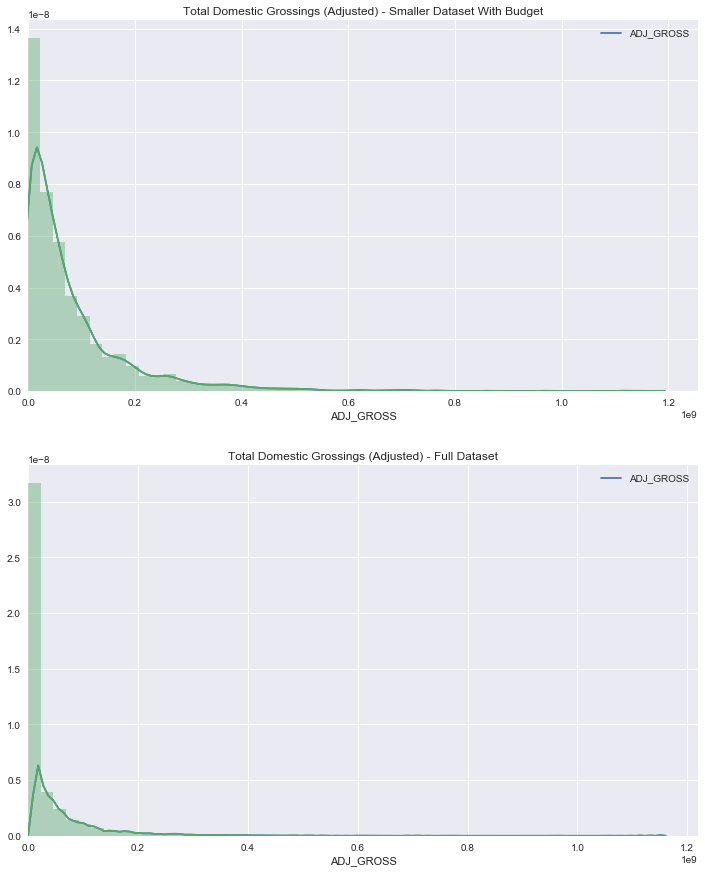

In [28]:
fig, (ax1, ax2) = plt.subplots(2)

# With budget
ax1 = sns.kdeplot(df_budget.ADJ_GROSS, ax=ax1)
ax1 = sns.distplot(df_budget.ADJ_GROSS, ax=ax1)
ax1.set(xlim=(0, None), title='Total Domestic Grossings (Adjusted) - Smaller Dataset With Budget')

# Without budget
ax2 = sns.kdeplot(df.ADJ_GROSS, ax=ax2)
ax2 = sns.distplot(df.ADJ_GROSS, ax=ax2)
ax2.set(xlim=(0, None), title='Total Domestic Grossings (Adjusted) - Full Dataset')

fig.set_size_inches(12, 15)

In [29]:
# Massive skew
# Some log transformations to get things into a better scale
df['LOG_GROSS'] = df.ADJ_GROSS.apply(np.log)
df_budget['LOG_GROSS'] = df_budget.ADJ_GROSS.apply(np.log)

df_budget['LOG_BUDGET'] = df_budget.BUDGET.apply(np.log)

/Users/user/Desktop/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.
/Users/user/Desktop/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


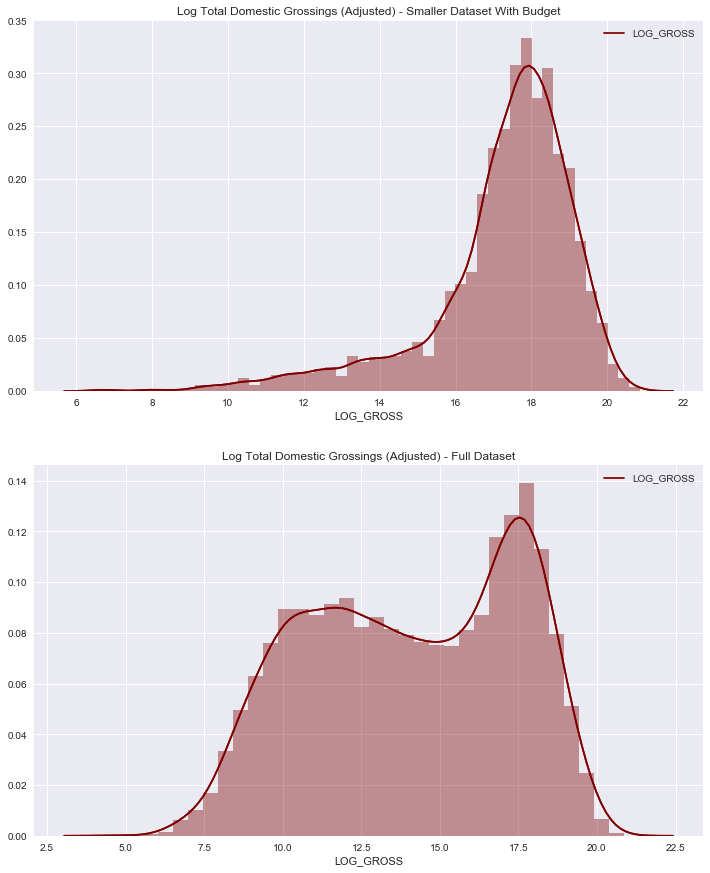

In [30]:
fig, (ax1, ax2) = plt.subplots(2)

# With budget - Log
ax1 = sns.kdeplot(df_budget.LOG_GROSS, ax=ax1, color='maroon')
ax1 = sns.distplot(df_budget.LOG_GROSS, ax=ax1, color='maroon')
ax1.set(xlim=(None, None), title='Log Total Domestic Grossings (Adjusted) - Smaller Dataset With Budget')

# Without budget - Log
ax2 = sns.kdeplot(df.LOG_GROSS, ax=ax2, color='maroon')
ax2 = sns.distplot(df.LOG_GROSS, ax=ax2, color='maroon')
ax2.set(xlim=(None, None), title='Log Total Domestic Grossings (Adjusted) - Full Dataset')

fig.set_size_inches(12, 15)

After log transformations, its much easier to see the bimodal distribution in the full dataset. The budget subset is unimodal with a strong left skew.

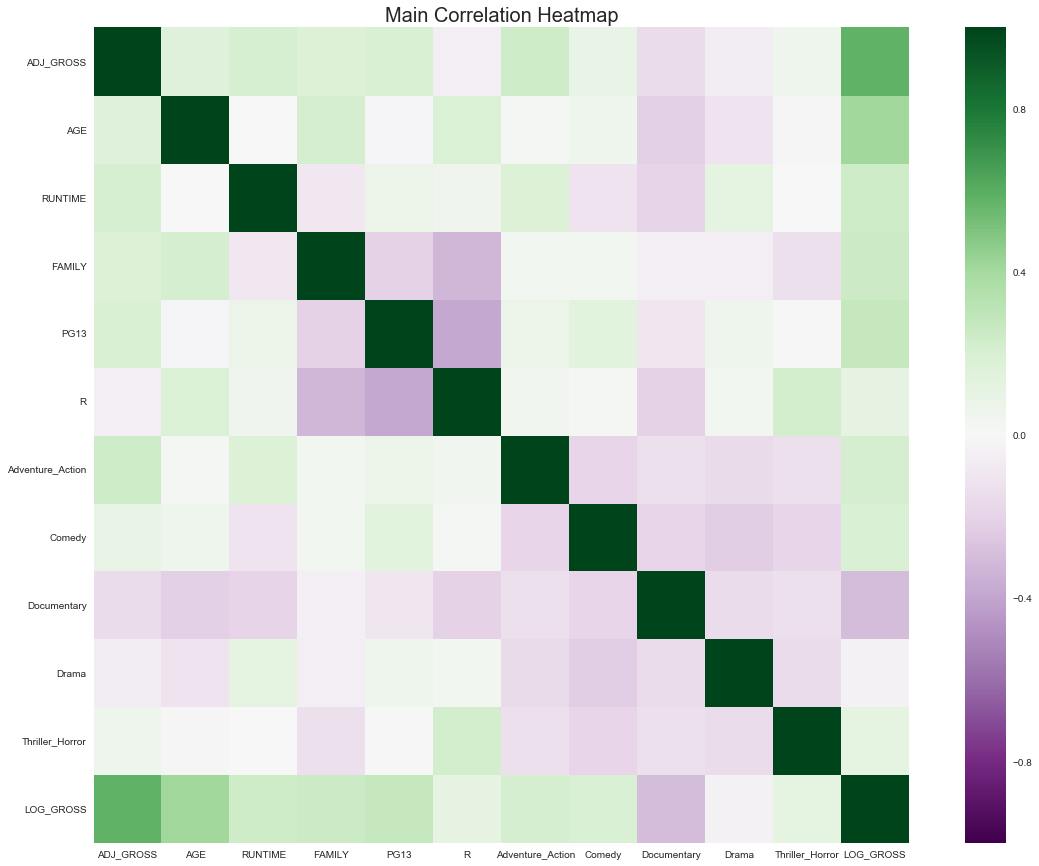

In [31]:
# Correlation heatmap without budget
# Font scale goes to 2, then 1 to get desired ratio?
plt.subplots(figsize=(20,15))
sns.set(font_scale=1)

fig = sns.heatmap(df.corr(), square=True, cmap='PRGn')
fig.set_title('Main Correlation Heatmap', fontdict={'fontsize': 20})

In [32]:
# Looking into the correlation matrices
df.corr()

,ADJ_GROSS,AGE,RUNTIME,FAMILY,PG13,R,Adventure_Action,Comedy,Documentary,Drama,Thriller_Horror,LOG_GROSS
ADJ_GROSS,1.000,0.159,0.209,0.177,0.199,-0.050,0.242,0.095,-0.149,-0.056,0.057,0.582
AGE,0.159,1.000,0.006,0.215,-0.018,0.183,0.019,0.062,-0.214,-0.115,-0.011,0.407
RUNTIME,0.209,0.006,1.000,-0.093,0.071,0.051,0.177,-0.110,-0.200,0.119,0.005,0.236
FAMILY,0.177,0.215,-0.093,1.000,-0.204,-0.321,0.037,0.036,-0.046,-0.049,-0.130,0.251
PG13,0.199,-0.018,0.071,-0.204,1.000,-0.390,0.074,0.144,-0.101,0.062,-0.007,0.278
R,-0.050,0.183,0.051,-0.321,-0.390,1.000,0.040,0.027,-0.207,0.034,0.224,0.114
Adventure_Action,0.242,0.019,0.177,0.037,0.074,0.040,1.000,-0.192,-0.129,-0.157,-0.127,0.211
Comedy,0.095,0.062,-0.110,0.036,0.144,0.027,-0.192,1.000,-0.191,-0.232,-0.188,0.192
Documentary,-0.149,-0.214,-0.200,-0.046,-0.101,-0.207,-0.129,-0.191,1.000,-0.156,-0.127,-0.301
Drama,-0.056,-0.115,0.119,-0.049,0.062,0.034,-0.157,-0.232,-0.156,1.000,-0.154,-0.037


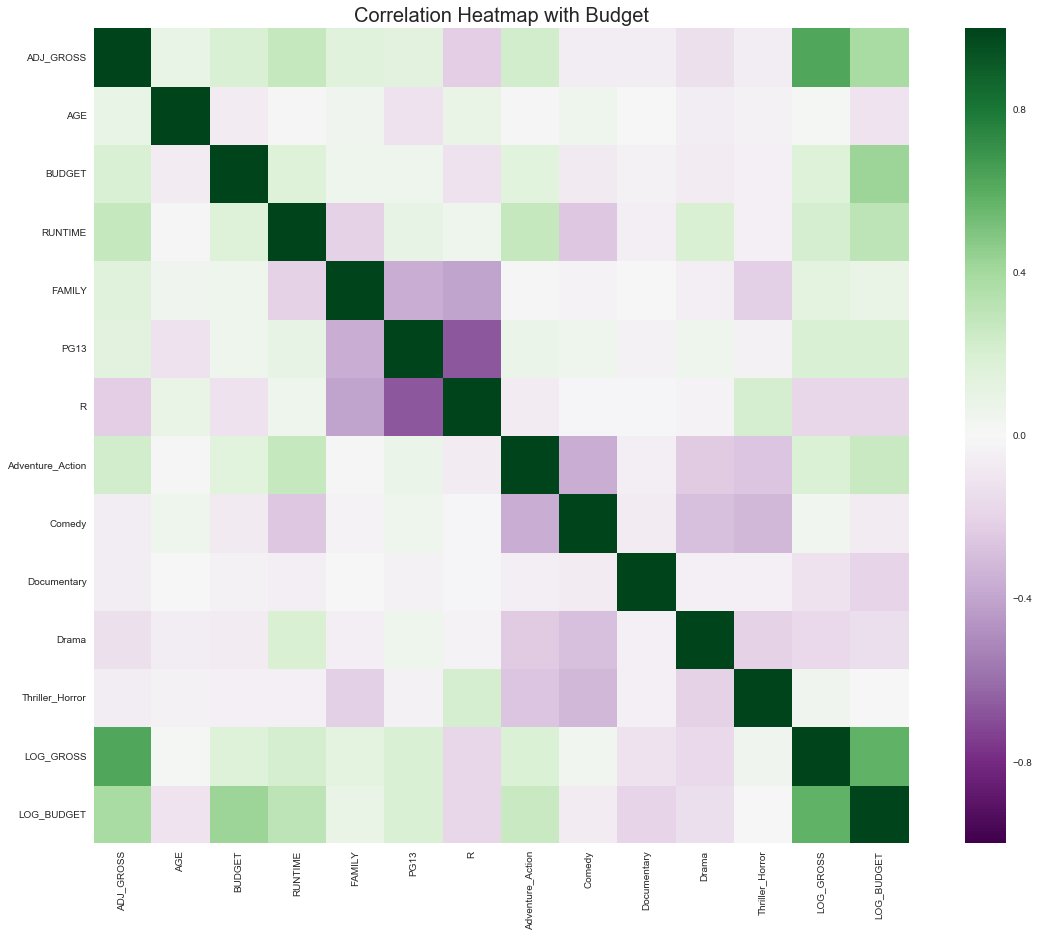

In [33]:
# Correlation heatmap without budget
# Font scale goes to 2, then 1 to get desired ratio?

plt.subplots(figsize=(20,15))
sns.set(font_scale=1)

fig = sns.heatmap(df_budget.corr(), square=True, cmap='PRGn')
fig.set_title('Correlation Heatmap with Budget', fontdict={'fontsize': 20})

In [34]:
# Budget correlation table
df_budget.corr()

,ADJ_GROSS,AGE,BUDGET,RUNTIME,FAMILY,PG13,R,Adventure_Action,Comedy,Documentary,Drama,Thriller_Horror,LOG_GROSS,LOG_BUDGET
ADJ_GROSS,1.000,0.100,0.192,0.277,1.555e-01,0.138,-0.224,0.234,-0.057,-5.822e-02,-0.131,-0.058,0.632,0.391
AGE,0.100,1.000,-0.065,-0.016,4.916e-02,-0.122,0.092,-0.016,0.060,-6.082e-03,-0.059,-0.036,0.021,-0.113
BUDGET,0.192,-0.065,1.000,0.167,6.007e-02,0.060,-0.122,0.145,-0.071,-3.392e-02,-0.070,-0.046,0.166,0.428
RUNTIME,0.277,-0.016,0.167,1.000,-2.073e-01,0.104,0.060,0.276,-0.253,-5.072e-02,0.197,-0.042,0.218,0.307
FAMILY,0.156,0.049,0.060,-0.207,1.000e+00,-0.363,-0.399,-0.008,-0.031,-7.976e-05,-0.053,-0.215,0.131,0.087
PG13,0.138,-0.122,0.060,0.104,-3.635e-01,1.000,-0.666,0.086,0.058,-3.246e-02,0.058,-0.039,0.188,0.194
R,-0.224,0.092,-0.122,0.060,-3.993e-01,-0.666,1.000,-0.064,-0.019,-1.974e-02,-0.030,0.216,-0.182,-0.184
Adventure_Action,0.234,-0.016,0.145,0.276,-8.245e-03,0.086,-0.064,1.000,-0.361,-5.267e-02,-0.238,-0.259,0.182,0.260
Comedy,-0.057,0.060,-0.071,-0.253,-3.104e-02,0.058,-0.019,-0.361,1.000,-6.379e-02,-0.288,-0.314,0.042,-0.065
Documentary,-0.058,-0.006,-0.034,-0.051,-7.976e-05,-0.032,-0.020,-0.053,-0.064,1.000e+00,-0.042,-0.046,-0.124,-0.199


### No real collinearty concerns, highest correlation is between 2 dummy variables

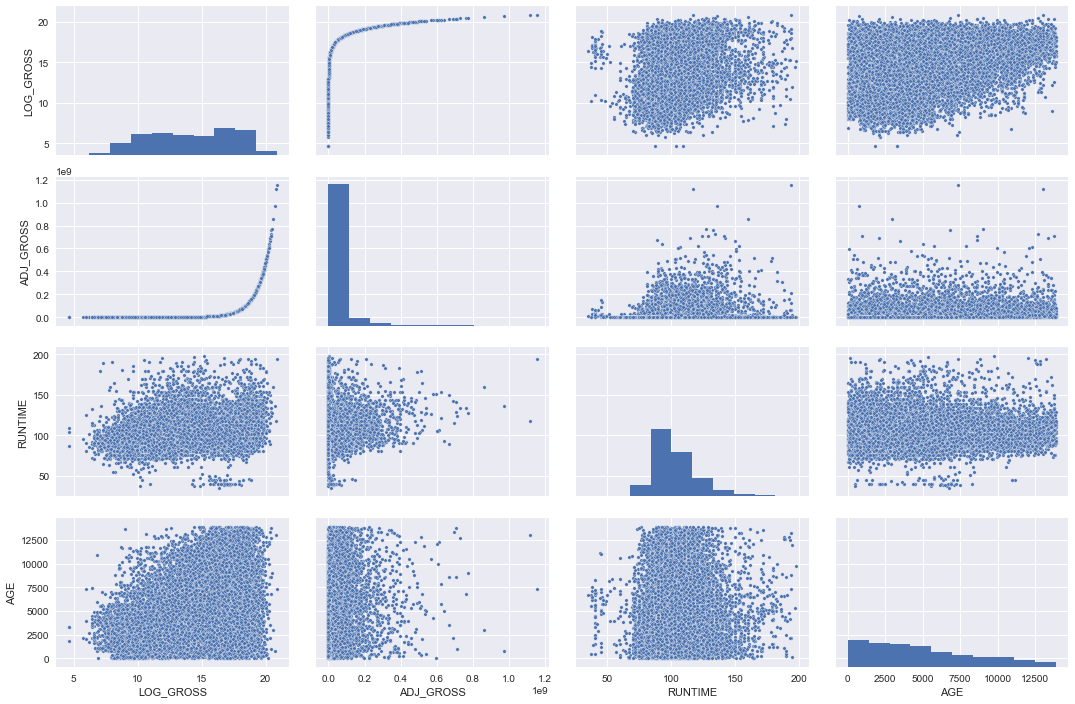

In [35]:
# Feature relationships, whole dataset no budget, no categoricals
sns.pairplot(df[['LOG_GROSS', 'ADJ_GROSS', 'RUNTIME', 'AGE']], size=2.5, aspect=1.5, markers=".")

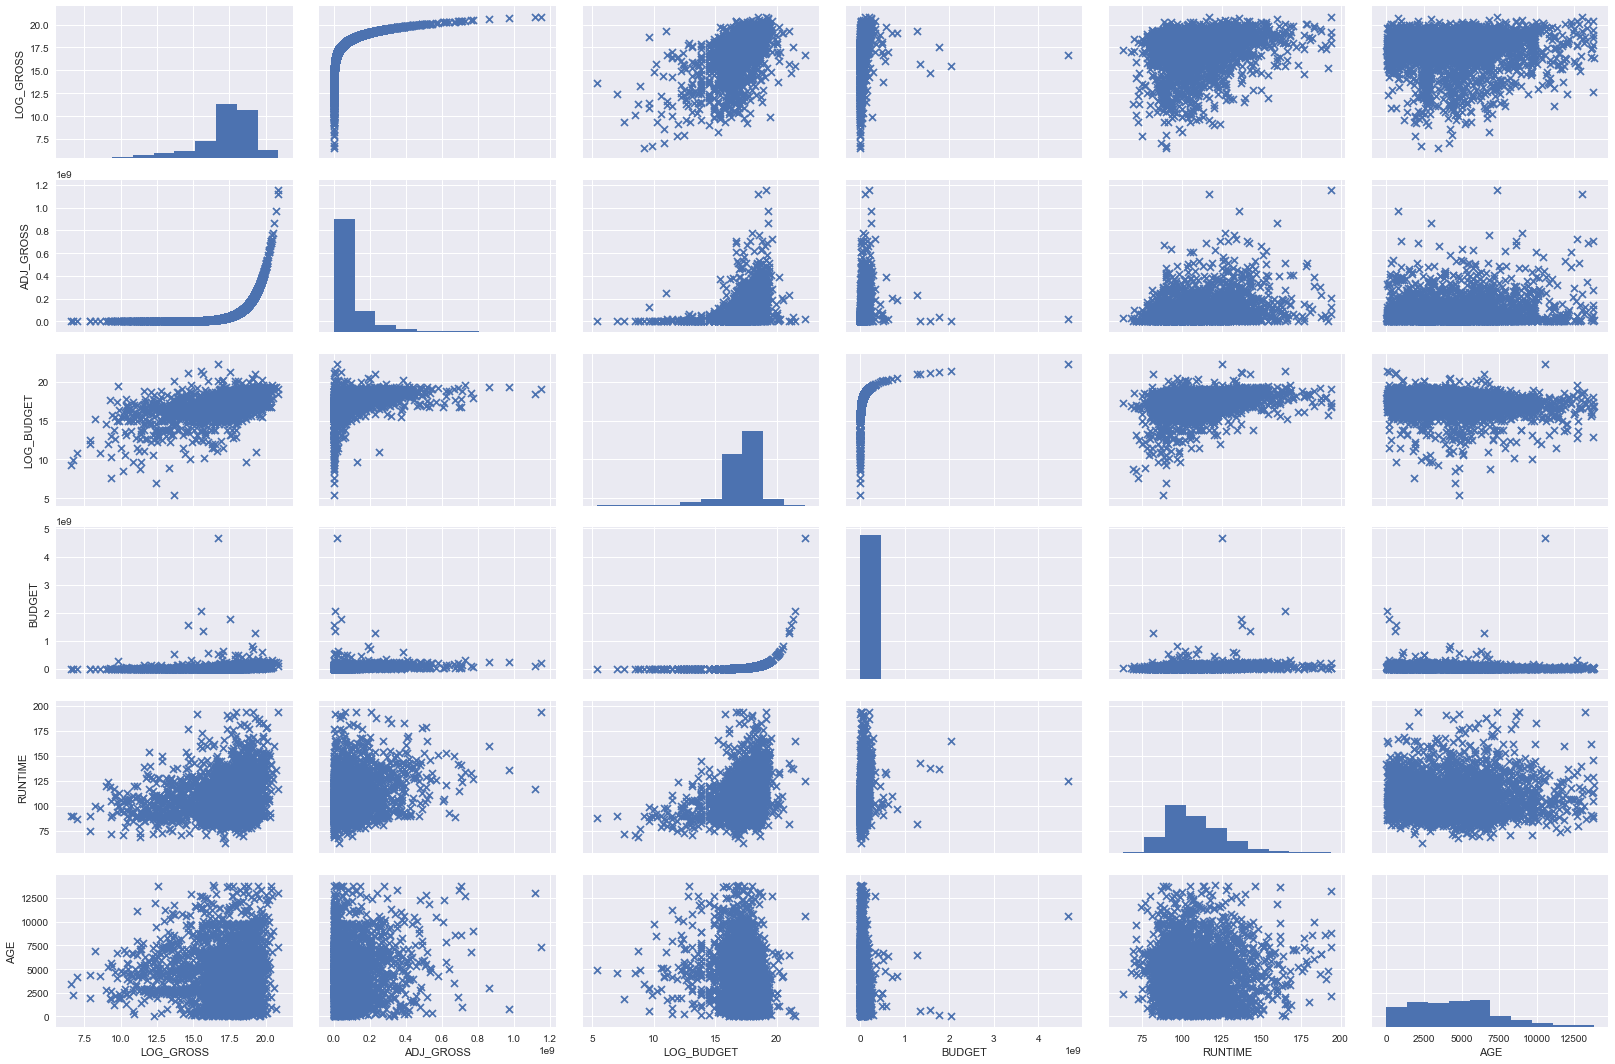

In [36]:
# Feature relationships, smaller budget dataset, no categoricals
sns.pairplot(df_budget[['LOG_GROSS', 'ADJ_GROSS', 'LOG_BUDGET', 'BUDGET', 'RUNTIME', 'AGE']], aspect=1.5, markers='x')

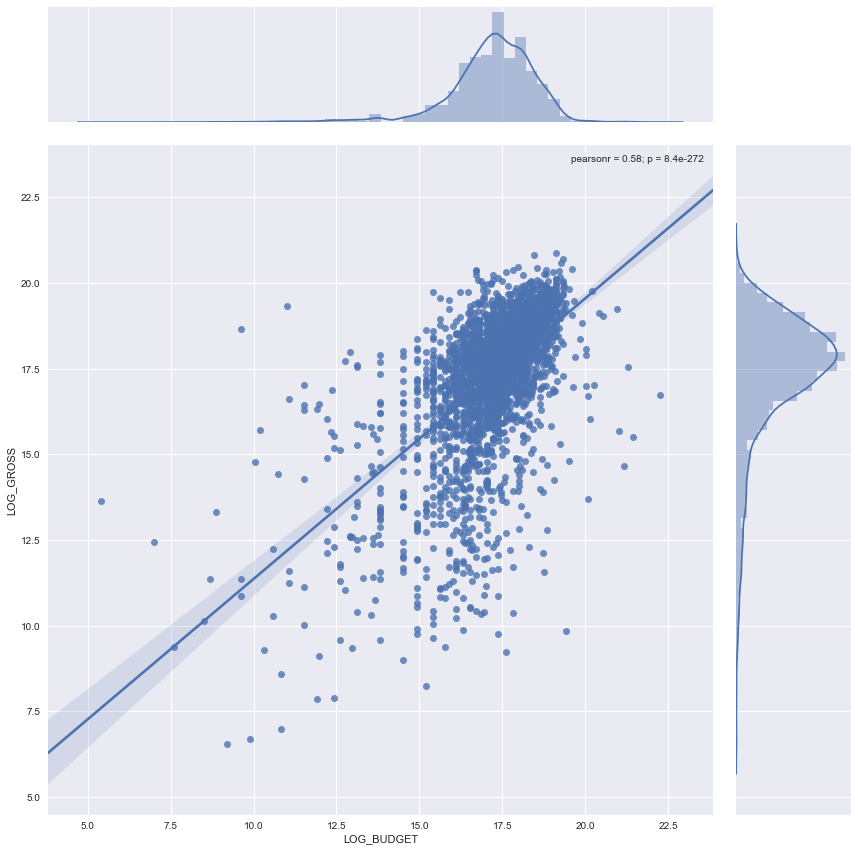

In [37]:
# Showing the log-log relationship between Gross and Budget. Nice linear relationship
fig = sns.jointplot("LOG_BUDGET", "LOG_GROSS", kind="regplot", data=df_budget, size=12)

### The relationships are pretty weak at best, but we do not have any collinearty issues. It would be nice to have all the budget data. Now for phase 3, the modelling.

In [38]:
# For models
# Going to set Age as Age in Days and Age in Years
df.rename(columns={'AGE': 'AGE_D'}, inplace=True)
df_budget.rename(columns={'AGE': 'AGE_D'}, inplace=True)

df['AGE_Y'] = df.AGE_D / 365
df_budget['AGE_Y'] = df_budget.AGE_D / 365

# Also interested in testing the difference of logged budget and squared budget
df_budget['BUDGET2'] = df_budget.BUDGET**2
df['AGE_Y2'] = df.AGE_Y**2
print('df normal shape: ', df.shape)
print('df budget shape: ', df_budget.shape)

/Users/user/Desktop/anaconda/lib/python3.6/site-packages/pandas/core/frame.py:3027: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  return super(DataFrame, self).rename(**kwargs)
/Users/user/Desktop/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys


df normal shape:  (14131, 16)
df budget shape:  (3041, 18)


/Users/user/Desktop/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # Remove the CWD from sys.path while we load stuff.


In [39]:
# Pickle DataFrames
df.to_pickle(path = 'data/mojo_jojo_main_cleaned.pickle')
df_budget.to_pickle(path = 'data/mojo_jojo_sub.pickle')